EDA script for master task 4 modeling dataset

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import os
import warnings

In [28]:
datapath = "C:/Users/hrowe/Documents/FHWA mobility trend report/T4 - Forecasting/Year 2/FHWA_Mobility_Trends/Year 2 County Level/Modeling_Year1_County_level/Data"
df = pd.read_csv(datapath + '/County_Year2_1_8_24.csv', keep_default_na= True, na_values=[""], index_col=0)
df

STATE_CODE  COUNTY_CODE  YEAR           VMT  POPULATION  \
0               1            1  2000  2.744493e+08     44021.0   
1               1            3  2000  1.196020e+09    141342.0   
2               1            5  2000  1.276073e+08     29015.0   
3               1            7  2000  9.060923e+07     19913.0   
4               1            9  2000  2.181014e+08     51107.0   
...           ...          ...   ...           ...         ...   
68474          46          102  2020           NaN         NaN   
68475          88          180  2020           NaN         NaN   
68476          88          181  2020           NaN         NaN   
68477          88          182  2020           NaN         NaN   
68478          88          183  2020           NaN         NaN   

       TOTAL_EMISSIONS  True_Fips  True_GDP  Unemployment_Rate  \
0                  NaN        NaN       NaN              0.041   
1                  NaN        NaN       NaN              0.037   
2                  NaN        NaN       NaN              0.056   
3                  NaN        NaN       NaN              0.054   
4                  NaN        NaN       NaN              0.035   
...                ...        ...       ...                ...   
68474     60853.553680    46102.0  312466.0              0.089   
68475         3.586519        NaN       NaN                NaN   
68476         5.683000        NaN       NaN                NaN   
68477        13.910431        NaN       NaN                NaN   
68478         0.079787        NaN       NaN                NaN   

       Charging_Stations  ...  Charging_Stations_per_person  \
0                    0.0  ...                           0.0   
1                    0.0  ...                           0.0   
2                    0.0  ...                           0.0   
3                    0.0  ...                           0.0   
4                    0.0  ...                           0.0   
...                  ...  ...                           ...   
68474                0.0  ...                           NaN   
68475                0.0  ...                           NaN   
68476                0.0  ...                           NaN   
68477                0.0  ...                           NaN   
68478                0.0  ...                           NaN   

       LNMILES_per_person  UPT_per_person  TRANSIT_USER_COUNT   County_Type  \
0                0.044986             NaN                 NaN  Metropolitan   
1                0.034708             NaN                 NaN        Fringe   
2                0.085443             NaN                 NaN  Micropolitan   
3                0.090632             NaN                 NaN        Fringe   
4                0.054074             NaN                 NaN        Fringe   
...                   ...             ...                 ...           ...   
68474                 NaN             NaN                 NaN        Tribal   
68475                 NaN             NaN                 NaN           NaN   
68476                 NaN             NaN                 NaN           NaN   
68477                 NaN             NaN                 NaN           NaN   
68478                 NaN             NaN                 NaN           NaN   

       INTERNET_CONNECTIONS  UNEMPLOYED  Labor_Force  TELEWORKERS  \
0                       NaN     896.301      21861.0          NaN   
1                       NaN    2589.223      69979.0          NaN   
2                       NaN     641.144      11449.0          NaN   
3                       NaN     465.642       8623.0          NaN   
4                       NaN     884.310      25266.0          NaN   
...                     ...         ...          ...          ...   
68474                   NaN     336.331       3779.0          NaN   
68475                   NaN         NaN          NaN          NaN   
68476                   NaN         NaN          NaN          NaN   
68477                   N

Looking at NAs

In [32]:
df.isna().sum()

STATE_CODE                          0
COUNTY_CODE                         0
YEAR                                0
VMT                              1291
POPULATION                        631
TOTAL_EMISSIONS                 50762
True_Fips                        3543
True_GDP                         3543
Unemployment_Rate                 288
Charging_Stations                   0
LNMILES                          2578
TMS                             20550
TELEWORK                        20550
Full_FIPS_Code                      0
ALAND_SQMI                        159
WAREHOUSE_EMPLY                 23195
COURIER_EMPLY                   21004
COURIER_WAGES                   21004
COURIER_NONEMP_ESTAB            15852
COURIER_NONEMP_RCPTOT           15852
CPI                              4182
COURIER_NONEMP_RCPTOT_REAL       4182
DRIVER_NONEMP_ESTAB             19346
DRIVER_NONEMP_RCPTOT            19346
DRIVER_NONEMP_RCPTOT_REAL       20041
POP_DENSITY                       645
UPT_distr_co

In [5]:
df.VMT.isna().groupby([df['YEAR']]).sum().astype(int).reset_index(name='countNaN').sort_values('countNaN', ascending=False)

YEAR  countNaN
11  2011       429
14  2014       368
8   2008       312
20  2020        94
17  2017        88
19  2019         0
18  2018         0
16  2016         0
15  2015         0
13  2013         0
12  2012         0
0   2000         0
1   2001         0
9   2009         0
7   2007         0
6   2006         0
5   2005         0
4   2004         0
3   2003         0
2   2002         0
10  2010         0

In [6]:
df.VMT.isna().groupby([df['STATE_CODE']]).sum().astype(int).reset_index(name='countNaN').sort_values('countNaN', ascending=False)

STATE_CODE  countNaN
51          72       390
15          19       109
1            2        80
43          48        73
17          21        58
27          31        52
16          20        51
46          51        50
25          29        39
21          25        30
10          13        30
33          37        24
36          40        21
22          26        20
3            5        19
13          17        18
42          47        18
48          54        18
5            8        17
41          46        17
18          22        15
52          78        15
26          30        13
0            1        12
14          18        11
35          39        11
24          28         9
53          88         8
44          49         6
12          16         6
38          42         6
23          27         6
11          15         4
2            4         4
31          35         3
4            6         3
19          23         3
34          38         3
49          55         3
47          53         3
40          45         3
45          50         3
9           12         3
28          32         2
32          36         2
8           11         0
29          33         0
7           10         0
37          41         0
6            9         0
20          24         0
50          56         0
30          34         0
39          44         0

In [7]:
#expect all NAs to come from 2000 and 2001 (NTD begins in 2002)
df.UPT_distr_commuters.isna().groupby([df['YEAR']]).sum().astype(int).reset_index(name='countNaN').sort_values('countNaN', ascending=False)

YEAR  countNaN
1   2001      2897
0   2000      2894
11  2011         0
19  2019         0
18  2018         0
17  2017         0
16  2016         0
15  2015         0
14  2014         0
13  2013         0
12  2012         0
10  2010         0
9   2009         0
8   2008         0
7   2007         0
6   2006         0
5   2005         0
4   2004         0
3   2003         0
2   2002         0
20  2020         0

Seeing if total of counties sums to the FHWA national reported VMT

In [8]:
df.VMT.groupby([df['YEAR']]).sum().reset_index(name='sum_county_vmt')

YEAR  sum_county_vmt
0   2000    1.309143e+12
1   2001    1.328207e+12
2   2002    1.355973e+12
3   2003    1.373655e+12
4   2004    1.412486e+12
5   2005    2.137255e+12
6   2006    2.147280e+12
7   2007    2.152340e+12
8   2008    2.099410e+12
9   2009    2.074391e+12
10  2010    2.067518e+12
11  2011    2.025359e+12
12  2012    2.606155e+12
13  2013    2.609288e+12
14  2014    2.550039e+12
15  2015    2.645989e+12
16  2016    2.722543e+12
17  2017    2.744461e+12
18  2018    2.753708e+12
19  2019    2.756783e+12
20  2020    2.435705e+12

[Text(0.5, 1.0, 'Sum of county VMT')]

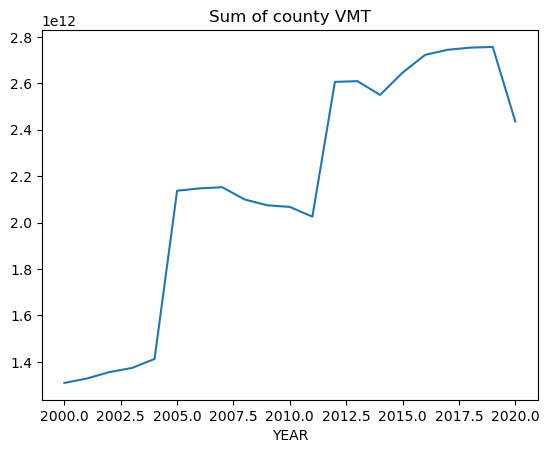

In [9]:
df.groupby('YEAR').VMT.sum().plot().set(title = "Sum of county VMT")

In [10]:
#expect most NAs to come pre 2005 because ACS started collecting this metric in 2005
df.TELEWORK.isna().groupby([df['YEAR']]).sum().astype(int).reset_index(name='countNaN')

YEAR  countNaN
0   2000      2894
1   2001      2897
2   2002      2898
3   2003      2906
4   2004      2908
5   2005       787
6   2006       787
7   2007       787
8   2008       906
9   2009       787
10  2010       787
11  2011       911
12  2012        10
13  2013        10
14  2014        81
15  2015         0
16  2016         0
17  2017        87
18  2018         0
19  2019        18
20  2020        89

### Findings 
- need to remove some state codes (like 72, PR) from modeling dataset to ensure we only model the 50 states (no territories)

[Text(0.5, 1.0, 'Sum of county capital_transit_funding')]

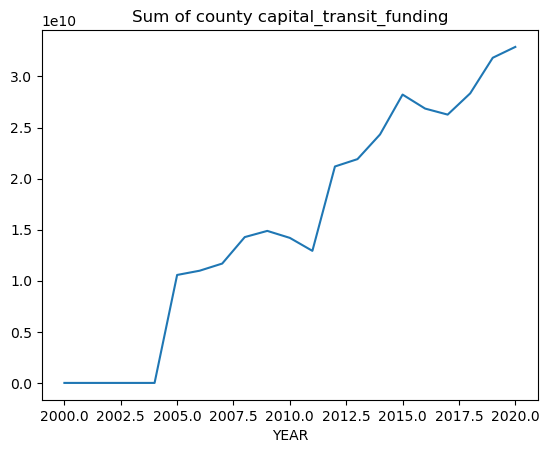

In [11]:
df.groupby('YEAR').capital_transit_funding.sum().plot().set(title = "Sum of county capital_transit_funding")

In [12]:
df.groupby(['STATE_CODE'])['capital_transit_funding'].sum().reset_index(name='StateSum')

STATE_CODE      StateSum
0            1  2.474052e+08
1            2  4.100619e+08
2            4  4.291440e+09
3            5  1.868868e+08
4            6  9.646198e+10
5            8  1.035340e+10
6            9  2.562527e+09
7           10  0.000000e+00
8           11  9.418679e+09
9           12  5.594343e+09
10          13  4.263592e+09
11          15  1.372650e+07
12          16  6.442876e+07
13          17  1.477664e+10
14          18  7.714882e+08
15          19  3.222189e+08
16          20  4.639625e+08
17          21  4.272106e+08
18          22  5.018208e+08
19          23  1.678683e+08
20          24  4.883215e+09
21          25  1.624919e+10
22          26  3.597555e+09
23          27  4.744241e+09
24          28  1.430994e+08
25          29  1.196085e+09
26          30  3.682768e+07
27          31  1.667323e+08
28          32  5.839451e+08
29          33  3.906070e+09
30          34  9.361026e+09
31          35  4.798971e+08
32          36  7.659437e+10
33          37  2.512830e+09
34          38  5.446887e+07
35          39  4.944862e+09
36          40  2.410937e+08
37          41  3.541895e+09
38          42  1.212079e+10
39          44  1.482444e+09
40          45  4.562714e+08
41          46  1.080846e+08
42          47  5.672268e+08
43          48  1.289121e+10
44          49  9.586169e+08
45          50  6.190606e+07
46          51  2.398043e+09
47          53  1.501610e+10
48          54  1.376943e+08
49          55  5.973867e+08
50          56  9.605782e+06
51          72  0.000000e+00
52          78  0.000000e+00
53          88  0.000000e+00

1/4/23: Are there any metro counties where capital transit funding = 0?

answer: yes, 7k observations of this

In [14]:
df_temp = df[(df['County_Type'] == 'Metropolitan') & (df['capital_transit_funding'] == 0) ]
df_temp = df_temp[['County_Type', 'YEAR', 'STATE_CODE', 'COUNTY_CODE','Full_FIPS_Code', 'TMS', 'TRANSIT_USER_COUNT', 'capital_transit_funding']]
df_temp

County_Type  YEAR  STATE_CODE  COUNTY_CODE  Full_FIPS_Code       TMS  \
126    Metropolitan  2002           1            1            1001       NaN   
132    Metropolitan  2002           1           15            1015       NaN   
140    Metropolitan  2002           1           33            1033       NaN   
151    Metropolitan  2002           1           55            1055       NaN   
159    Metropolitan  2002           1           73            1073       NaN   
...             ...   ...         ...          ...             ...       ...   
67712  Metropolitan  2011          19           49           19049  0.013273   
67765  Metropolitan  2011          19          155           19155       NaN   
67778  Metropolitan  2011          19          181           19181  0.021235   
67784  Metropolitan  2011          19          193           19193       NaN   
67944  Metropolitan  2014          25           15           25015  0.014591   

       TRANSIT_USER_COUNT  capital_transit_funding  
126                   NaN                      0.0  
132                   NaN                      0.0  
140                   NaN                      0.0  
151                   NaN                      0.0  
159                   NaN                      0.0  
...                   ...                      ...  
67712             22245.0                      0.0  
67765                 NaN                      0.0  
67778             24240.0                      0.0  
67784                 NaN                      0.0  
67944             36648.0                      0.0  

[7885 rows x 8 columns]

In [15]:
len(df_temp.Full_FIPS_Code.unique())

707

In [16]:
df_temp.groupby('YEAR').size()

YEAR
2002    706
2003    706
2004    706
2005    490
2006    480
2007    482
2008    485
2009    479
2010    481
2011    470
2012    259
2013    264
2014    265
2015    257
2016    281
2017    285
2018    269
2019    260
2020    260
dtype: int64

In [17]:
df_temp[df_temp['Full_FIPS_Code'] == 6059]

County_Type  YEAR  STATE_CODE  COUNTY_CODE  Full_FIPS_Code       TMS  \
3278   Metropolitan  2002           6           59            6059       NaN   
3334   Metropolitan  2003           6           59            6059       NaN   
3390   Metropolitan  2004           6           59            6059       NaN   
3453   Metropolitan  2005           6           59            6059       NaN   
3517   Metropolitan  2006           6           59            6059       NaN   
3581   Metropolitan  2007           6           59            6059       NaN   
3645   Metropolitan  2008           6           59            6059       NaN   
3851   Metropolitan  2011           6           59            6059       NaN   
3853   Metropolitan  2012           6           59            6059  0.027511   
3855   Metropolitan  2012           6           59            6059  0.027511   
3857   Metropolitan  2012           6           59            6059  0.027511   
3859   Metropolitan  2012           6           59            6059  0.027511   
3861   Metropolitan  2013           6           59            6059  0.023725   
3863   Metropolitan  2013           6           59            6059  0.023725   
3865   Metropolitan  2013           6           59            6059  0.023725   
3867   Metropolitan  2013           6           59            6059  0.023725   
3877   Metropolitan  2015           6           59            6059  0.020467   
3879   Metropolitan  2015           6           59            6059  0.020467   
3881   Metropolitan  2015           6           59            6059  0.020467   
3883   Metropolitan  2015           6           59            6059  0.020467   
4437   Metropolitan  2016           6           59            6059  0.020216   
4439   Metropolitan  2016           6           59            6059  0.020216   
4441   Metropolitan  2016           6           59            6059  0.020216   
4443   Metropolitan  2016           6           59            6059  0.020216   
4604   Metropolitan  2017           6           59            6059  0.016928   
4606   Metropolitan  2017           6           59            6059  0.016928   
4608   Metropolitan  2017           6           59            6059  0.016928   
4610   Metropolitan  2017           6           59            6059  0.016928   
61139  Metropolitan  2009           6           59            6059       NaN   
64259  Metropolitan  2010           6           59            6059       NaN   

       TRANSIT_USER_COUNT  capital_transit_funding  
3278                  NaN                      0.0  
3334                  NaN                      0.0  
3390                  NaN                      0.0  
3453                  NaN                      0.0  
3517                  NaN                      0.0  
3581                  NaN                      0.0  
3645                  NaN                      0.0  
3851                  NaN                      0.0  
3853            1341137.0                      0.0  
3855            1341137.0                      0.0  
3857            1341137.0                      0.0  
3859            1341137.0                      0.0  
3861            1182868.0                      0.0  
3863            1182868.0                      0.0  
3865            1182868.0                      0.0  
3867            1182868.0                      0.0  
3877            1056543.0                      0.0  
3879            1056543.0                      0.0  
3881            1056543.0                      0.0  
3883            1056543.0                      0.0  
4437            1060794.0                      0.0  
4439            1060794.0                      0.0  
4441            1060794.0                      0.0  
4443            1060794.0                      0.0  
4604             892366.0                      0.0  
4606             892366.0                      0.0  
4608             892366.0                      0.0  
4610             892366.0                  

In [18]:
df[df['County_Type'] == 'Metropolitan'].groupby('YEAR').size()

YEAR
2000     703
2001     705
2002     706
2003     706
2004     706
2005     890
2006     890
2007     890
2008     893
2009     890
2010     890
2011     893
2012    1094
2013    1094
2014    1097
2015    1096
2016    1097
2017    1097
2018    1097
2019    1097
2020    1097
dtype: int64

In [19]:
df_annual_national = df.groupby('YEAR').sum().reset_index()

[Text(0.5, 1.0, 'National Self Employed \nTaxi/Rideshare Driver Revenue')]

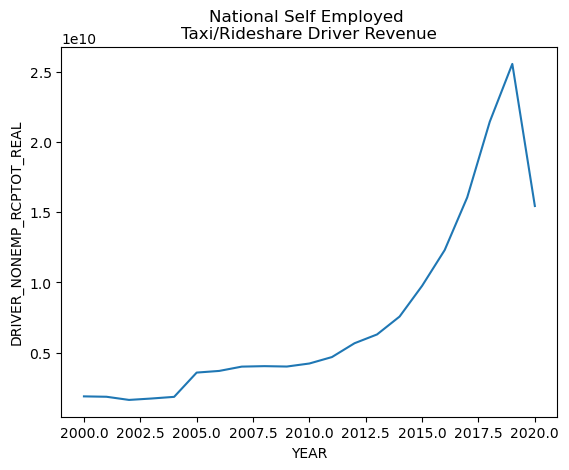

In [22]:
#sns.lineplot(data = df_annual_national, x= 'YEAR', y= 'COURIER_NONEMP_RCPTOT_REAL', estimator = np.sum).set(title = "National Self Employed Courier Revenue")
sns.lineplot(data=df_annual_national, x= 'YEAR', y= 'DRIVER_NONEMP_RCPTOT_REAL', estimator = np.sum).set(title= "National Self Employed \nTaxi/Rideshare Driver Revenue")

#### Joining transit funding indicator to explore if it is better 

In [48]:
transit_funding = pd.read_csv('C:/Users/hrowe/Documents/FHWA mobility trend report/T4 - Forecasting/Year 2/FHWA_Mobility_Trends/Year 2 County Level/Data_engineering_Year1_County_level/Transit/By household wo vehicle - using capital funding/dis_cap_funds_by_zero_car_hh1_9.csv')

transit_funding['FIPS_CODE'] = transit_funding['FIPS_CODE'].astype(int)#.astype(str).str.zfill(5)
transit_funding = transit_funding.rename(columns={'Capital Funding': 'capital_transit_fundingv2','FIPS_CODE': 'Full_FIPS_Code' })
transit_funding = transit_funding[['YEAR', 'Full_FIPS_Code', 'STATE_CODE', 'capital_transit_fundingv2']]

transit_funding

YEAR  Full_FIPS_Code  STATE_CODE  capital_transit_fundingv2
0     2005            1001         1.0               2.115639e+06
1     2005            1003         1.0               2.780840e+05
2     2005            1009         1.0               1.021020e+06
3     2005            1033         1.0               0.000000e+00
4     2005            1051         1.0               2.644549e+06
...    ...             ...         ...                        ...
8667  2021           55131        55.0               1.988815e+06
8668  2021           55133        55.0               2.675891e+06
8669  2021           55139        55.0               3.856840e+06
8670  2021           56021        56.0               7.842700e+04
8671  2021           56025        56.0               0.000000e+00

[8672 rows x 4 columns]

In [ ]:
transit_funding

In [50]:
transit_funding[transit_funding['YEAR'] == 2005].groupby(['STATE_CODE'])['capital_transit_fundingv2'].sum()

STATE_CODE
1.0     2.197691e+07
2.0     1.170911e+07
4.0     2.966260e+08
5.0     9.993769e+06
6.0     1.610125e+09
8.0     1.650641e+09
9.0     2.525113e+07
11.0    2.379872e+09
12.0    4.036344e+08
13.0    4.039676e+09
15.0    0.000000e+00
16.0    1.013788e+06
17.0    6.953602e+09
18.0    6.064890e+07
19.0    1.930578e+07
20.0    3.406874e+07
21.0    1.189338e+08
22.0    1.435278e+07
23.0    3.904296e+06
24.0    1.546678e+09
25.0    4.007185e+09
26.0    9.328428e+07
27.0    1.972381e+08
28.0    5.774544e+06
29.0    6.330175e+08
30.0    1.869457e+06
31.0    4.200983e+06
32.0    0.000000e+00
33.0    2.772874e+08
34.0    8.151262e+09
35.0    4.957386e+07
36.0    6.636249e+10
37.0    7.344550e+08
38.0    3.384925e+06
39.0    2.759230e+08
40.0    8.075342e+06
41.0    8.887261e+07
42.0    1.658774e+09
44.0    2.103418e+07
45.0    1.383591e+08
46.0    2.533152e+06
47.0    7.320977e+07
48.0    1.502974e+09
50.0    1.365840e+06
54.0    5.878023e+07
55.0    7.895859e+06
56.0    1.005050e+05
Na

In [51]:
#does this match the NTD data?
transit_funding.groupby(['YEAR'])['capital_transit_fundingv2'].sum()

YEAR
2005    1.035609e+11
2006    1.068248e+11
2007    1.110590e+11
2008    1.404668e+11
2009    1.463565e+11
2010    1.329351e+11
2011    1.117202e+11
2012    1.324638e+11
2013    1.312491e+11
2014    1.264899e+11
2015    1.370313e+11
2016    1.360816e+11
2017    1.357237e+11
2018    1.584652e+11
2019    1.884704e+11
2020    1.681366e+11
2021    1.735305e+11
Name: capital_transit_fundingv2, dtype: float64

In [29]:
df = pd.merge(df, transit_funding, on = ['Full_FIPS_Code', 'YEAR'] , how='left')
df

STATE_CODE  COUNTY_CODE  YEAR           VMT  POPULATION  \
0               1            1  2000  2.744493e+08     44021.0   
1               1            3  2000  1.196020e+09    141342.0   
2               1            5  2000  1.276073e+08     29015.0   
3               1            7  2000  9.060923e+07     19913.0   
4               1            9  2000  2.181014e+08     51107.0   
...           ...          ...   ...           ...         ...   
68474          46          102  2020           NaN         NaN   
68475          88          180  2020           NaN         NaN   
68476          88          181  2020           NaN         NaN   
68477          88          182  2020           NaN         NaN   
68478          88          183  2020           NaN         NaN   

       TOTAL_EMISSIONS  True_Fips  True_GDP  Unemployment_Rate  \
0                  NaN        NaN       NaN              0.041   
1                  NaN        NaN       NaN              0.037   
2                  NaN        NaN       NaN              0.056   
3                  NaN        NaN       NaN              0.054   
4                  NaN        NaN       NaN              0.035   
...                ...        ...       ...                ...   
68474     60853.553680    46102.0  312466.0              0.089   
68475         3.586519        NaN       NaN                NaN   
68476         5.683000        NaN       NaN                NaN   
68477        13.910431        NaN       NaN                NaN   
68478         0.079787        NaN       NaN                NaN   

       Charging_Stations  ...  LNMILES_per_person  UPT_per_person  \
0                    0.0  ...            0.044986             NaN   
1                    0.0  ...            0.034708             NaN   
2                    0.0  ...            0.085443             NaN   
3                    0.0  ...            0.090632             NaN   
4                    0.0  ...            0.054074             NaN   
...                  ...  ...                 ...             ...   
68474                0.0  ...                 NaN             NaN   
68475                0.0  ...                 NaN             NaN   
68476                0.0  ...                 NaN             NaN   
68477                0.0  ...                 NaN             NaN   
68478                0.0  ...                 NaN             NaN   

       TRANSIT_USER_COUNT   County_Type  INTERNET_CONNECTIONS  UNEMPLOYED  \
0                     NaN  Metropolitan                   NaN     896.301   
1                     NaN        Fringe                   NaN    2589.223   
2                     NaN  Micropolitan                   NaN     641.144   
3                     NaN        Fringe                   NaN     465.642   
4                     NaN        Fringe                   NaN     884.310   
...                   ...           ...                   ...         ...   
68474                 NaN        Tribal                   NaN     336.331   
68475                 NaN           NaN                   NaN         NaN   
68476                 NaN           NaN                   NaN         NaN   
68477                 NaN           NaN                   NaN         NaN   
68478                 NaN           NaN                   NaN         NaN   

       Labor_Force  TELEWORKERS  capital_transit_funding  \
0          21861.0          NaN                      NaN   
1          69979.0          NaN                      NaN   
2          11449.0          NaN                      NaN   
3           8623.0          NaN                      NaN   
4          25266.0          NaN                      NaN   
...            ...          ...                      ...   
68474       3779.0          NaN                      0.0   
68475          NaN          NaN                      0.0   
68476          NaN          NaN                      0.0   
68477          NaN          NaN                      0.0   
68478  

In [ ]:
df[ df['capital_transit_fundingv2'] == 0 ]

In [23]:
#df.capital_transit_fundingv2.replace(np.nan, 0, inplace = True)

In [37]:
df_test = df[(df['capital_transit_fundingv2'] == 0) & (df['County_Type'] == 'Metropolitan')  ]
df_test2 = df[(df['capital_transit_funding'] == 0) & (df['County_Type'] == 'Metropolitan')  ]

In [38]:
len(df_test)

283

In [39]:
len(df_test2)

7885

In [44]:
df_test.Full_FIPS_Code.unique()

array([ 1033,  1103,  1081,  4005,  5031,  6031,  6025,  8013,  8101,
       12115, 12073, 15009, 16019, 17077, 17091, 17199, 17113, 17183,
       17201, 17115, 18035, 18095, 18167, 19061, 21059, 21093, 21227,
       22055, 24001, 24045, 24005, 24015, 24025, 24021, 27027, 28049,
       28121, 29019, 34001, 34037, 35049, 36015, 36007, 37023, 37027,
       37067, 38017, 40027, 41009, 45083, 45079, 47011, 47063, 48339,
       48361, 48451, 48167, 48041, 48245, 48303, 48039, 51069, 51840,
       55009, 55015, 55035, 55063, 55087, 55139, 55059, 55105, 55039,
       56025,  9011, 23001, 37089], dtype=int64)

In [45]:
df.groupby(['YEAR'])['capital_transit_fundingv2'].sum()

YEAR
2000    0.000000e+00
2001    0.000000e+00
2002    0.000000e+00
2003    0.000000e+00
2004    0.000000e+00
2005    1.229572e+11
2006    1.264129e+11
2007    1.297674e+11
2008    1.614919e+11
2009    1.695888e+11
2010    1.574262e+11
2011    1.345885e+11
2012    1.649451e+11
2013    1.673237e+11
2014    1.700455e+11
2015    1.907916e+11
2016    1.852772e+11
2017    1.820216e+11
2018    2.015755e+11
2019    2.430153e+11
2020    2.279267e+11
Name: capital_transit_fundingv2, dtype: float64